## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.248369  0.406037  0.230885 -0.770659  1.106866  0.272974
1  0.291887  0.349211 -1.176876 -1.671394 -1.158155 -0.544872
2  1.383833  0.672468  0.209639 -0.347839 -0.124765 -0.085752
3  0.910759  1.401595 -1.393466  0.460892  1.330985  1.488548
4  0.985610  0.553134  0.417364  0.418193  0.666890  1.001635


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0075938	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9979389	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9884810	total: 59.1ms	remaining: 19.7s
3:	learn: 0.9788433	total: 60ms	remaining: 14.9s
4:	learn: 0.9708348	total: 60.8ms	remaining: 12.1s
5:	learn: 0.9622976	total: 61.3ms	remaining: 10.2s
6:	learn: 0.9525488	total: 61.8ms	remaining: 8.77s
7:	learn: 0.9459370	total: 62.4ms	remaining: 7.73s
8:	learn: 0.9378079	total: 62.9ms	remaining: 6.93s
9:	learn: 0.9297795	total: 63.4ms	remaining: 6.27s
10:	learn: 0.9219218	total: 63.9ms	remaining: 5.74s
11:	learn: 0.9133393	total: 64.4ms	remaining: 5.3s
12:	learn: 0.9037889	total: 64.9ms	remaining: 4.93s
13:	learn: 0.8956683	total: 65.3ms	remaining: 4.6s
14:	learn: 0.8899842	total: 65.8ms	remaining: 4.32s
15:	learn: 0.8811974	total: 66.1ms	remaining: 4.07s
16:	learn: 0.8727187	total: 66.5ms	remaining: 3.85s
17:	learn: 0.8646958	total: 66.9ms	remaining: 3.65s
18:	learn: 0.8564490	total: 67.3ms	remaining: 3.

108:	learn: 0.4240533	total: 108ms	remaining: 886ms
109:	learn: 0.4215920	total: 109ms	remaining: 881ms
110:	learn: 0.4182150	total: 109ms	remaining: 876ms
111:	learn: 0.4156072	total: 110ms	remaining: 870ms
112:	learn: 0.4117908	total: 110ms	remaining: 864ms
113:	learn: 0.4090526	total: 110ms	remaining: 858ms
114:	learn: 0.4064732	total: 111ms	remaining: 853ms
115:	learn: 0.4036772	total: 111ms	remaining: 848ms
116:	learn: 0.4010847	total: 112ms	remaining: 844ms
117:	learn: 0.3988620	total: 112ms	remaining: 840ms
118:	learn: 0.3968575	total: 113ms	remaining: 836ms
119:	learn: 0.3940501	total: 114ms	remaining: 833ms
120:	learn: 0.3911968	total: 114ms	remaining: 829ms
121:	learn: 0.3890297	total: 115ms	remaining: 825ms
122:	learn: 0.3864891	total: 115ms	remaining: 821ms
123:	learn: 0.3842842	total: 116ms	remaining: 817ms
124:	learn: 0.3817601	total: 116ms	remaining: 813ms
125:	learn: 0.3789754	total: 117ms	remaining: 809ms
126:	learn: 0.3768825	total: 117ms	remaining: 804ms
127:	learn: 

249:	learn: 0.1835138	total: 175ms	remaining: 524ms
250:	learn: 0.1824690	total: 175ms	remaining: 522ms
251:	learn: 0.1814783	total: 175ms	remaining: 521ms
252:	learn: 0.1803866	total: 176ms	remaining: 519ms
253:	learn: 0.1794880	total: 176ms	remaining: 517ms
254:	learn: 0.1788840	total: 176ms	remaining: 515ms
255:	learn: 0.1779075	total: 177ms	remaining: 514ms
256:	learn: 0.1766782	total: 177ms	remaining: 512ms
257:	learn: 0.1756252	total: 177ms	remaining: 510ms
258:	learn: 0.1748141	total: 178ms	remaining: 509ms
259:	learn: 0.1740773	total: 179ms	remaining: 508ms
260:	learn: 0.1731716	total: 179ms	remaining: 507ms
261:	learn: 0.1721738	total: 179ms	remaining: 505ms
262:	learn: 0.1710884	total: 180ms	remaining: 503ms
263:	learn: 0.1700866	total: 180ms	remaining: 502ms
264:	learn: 0.1689268	total: 181ms	remaining: 501ms
265:	learn: 0.1679868	total: 181ms	remaining: 499ms
266:	learn: 0.1669511	total: 181ms	remaining: 497ms
267:	learn: 0.1660012	total: 182ms	remaining: 496ms
268:	learn: 

504:	learn: 0.0598606	total: 278ms	remaining: 272ms
505:	learn: 0.0595858	total: 278ms	remaining: 272ms
506:	learn: 0.0593591	total: 279ms	remaining: 271ms
507:	learn: 0.0591363	total: 279ms	remaining: 271ms
508:	learn: 0.0589173	total: 280ms	remaining: 270ms
509:	learn: 0.0586806	total: 280ms	remaining: 269ms
510:	learn: 0.0583594	total: 281ms	remaining: 269ms
511:	learn: 0.0580927	total: 281ms	remaining: 268ms
512:	learn: 0.0578507	total: 282ms	remaining: 267ms
513:	learn: 0.0575904	total: 282ms	remaining: 267ms
514:	learn: 0.0573832	total: 283ms	remaining: 266ms
515:	learn: 0.0571601	total: 283ms	remaining: 266ms
516:	learn: 0.0568574	total: 284ms	remaining: 265ms
517:	learn: 0.0564476	total: 285ms	remaining: 265ms
518:	learn: 0.0561531	total: 285ms	remaining: 264ms
519:	learn: 0.0558670	total: 286ms	remaining: 264ms
520:	learn: 0.0556539	total: 286ms	remaining: 263ms
521:	learn: 0.0553682	total: 287ms	remaining: 262ms
522:	learn: 0.0549739	total: 287ms	remaining: 262ms
523:	learn: 

657:	learn: 0.0296930	total: 356ms	remaining: 185ms
658:	learn: 0.0295585	total: 356ms	remaining: 184ms
659:	learn: 0.0294301	total: 357ms	remaining: 184ms
660:	learn: 0.0293191	total: 357ms	remaining: 183ms
661:	learn: 0.0292105	total: 358ms	remaining: 183ms
662:	learn: 0.0290909	total: 358ms	remaining: 182ms
663:	learn: 0.0289653	total: 359ms	remaining: 181ms
664:	learn: 0.0288141	total: 359ms	remaining: 181ms
665:	learn: 0.0287192	total: 359ms	remaining: 180ms
666:	learn: 0.0285708	total: 360ms	remaining: 180ms
667:	learn: 0.0284062	total: 360ms	remaining: 179ms
668:	learn: 0.0282803	total: 361ms	remaining: 179ms
669:	learn: 0.0281665	total: 361ms	remaining: 178ms
670:	learn: 0.0280490	total: 362ms	remaining: 177ms
671:	learn: 0.0279111	total: 362ms	remaining: 177ms
672:	learn: 0.0277704	total: 363ms	remaining: 176ms
673:	learn: 0.0276897	total: 363ms	remaining: 176ms
674:	learn: 0.0275755	total: 364ms	remaining: 175ms
675:	learn: 0.0274372	total: 364ms	remaining: 175ms
676:	learn: 

869:	learn: 0.0135650	total: 460ms	remaining: 68.8ms
870:	learn: 0.0135209	total: 461ms	remaining: 68.3ms
871:	learn: 0.0134811	total: 462ms	remaining: 67.8ms
872:	learn: 0.0134534	total: 462ms	remaining: 67.2ms
873:	learn: 0.0134104	total: 463ms	remaining: 66.7ms
874:	learn: 0.0133713	total: 464ms	remaining: 66.2ms
875:	learn: 0.0133441	total: 464ms	remaining: 65.7ms
876:	learn: 0.0132954	total: 464ms	remaining: 65.1ms
877:	learn: 0.0132429	total: 465ms	remaining: 64.6ms
878:	learn: 0.0131989	total: 465ms	remaining: 64.1ms
879:	learn: 0.0131757	total: 466ms	remaining: 63.5ms
880:	learn: 0.0131528	total: 466ms	remaining: 63ms
881:	learn: 0.0131250	total: 467ms	remaining: 62.5ms
882:	learn: 0.0131024	total: 468ms	remaining: 61.9ms
883:	learn: 0.0130782	total: 468ms	remaining: 61.4ms
884:	learn: 0.0130405	total: 469ms	remaining: 60.9ms
885:	learn: 0.0130183	total: 469ms	remaining: 60.4ms
886:	learn: 0.0129926	total: 470ms	remaining: 59.8ms
887:	learn: 0.0129671	total: 470ms	remaining: 59

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

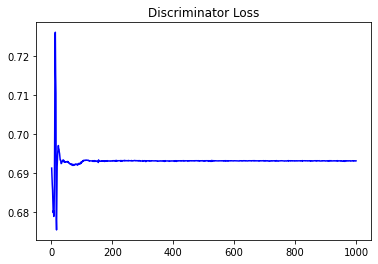

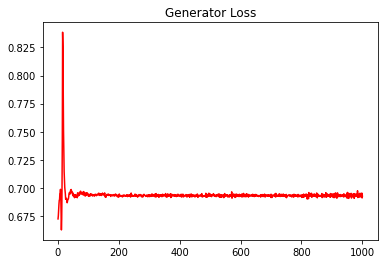

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09941689490462156


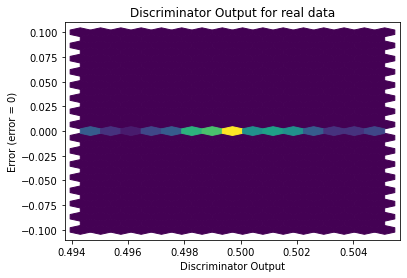

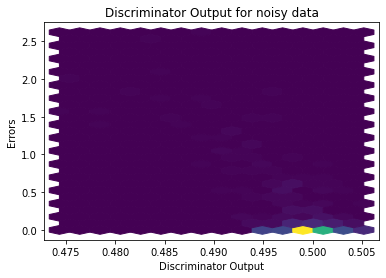

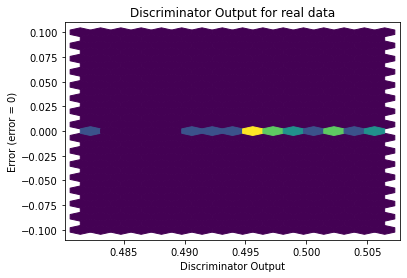

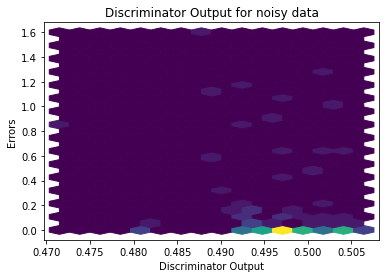

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


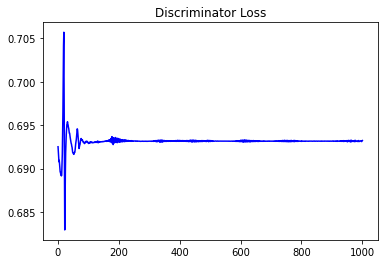

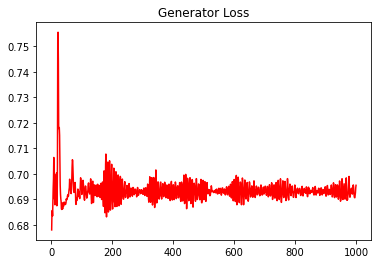

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11311334546624921


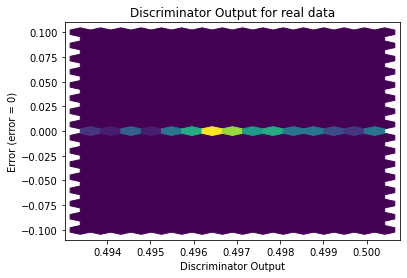

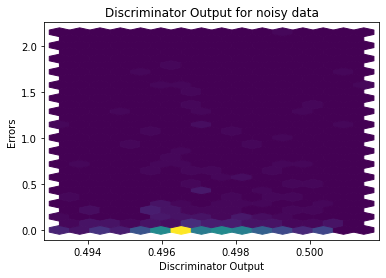

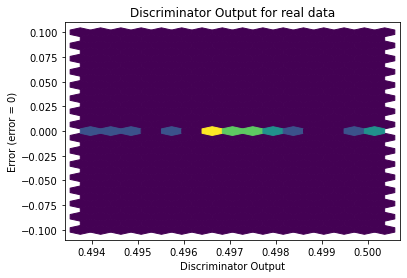

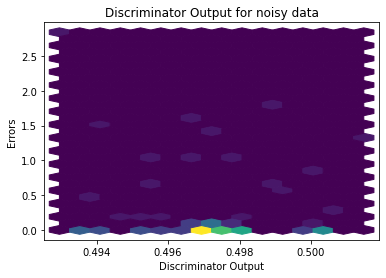

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1607]], requires_grad=True)
